In [3]:
# ✅ Install all required libraries
!pip install -q ultralytics tensorflow pillow opencv-python matplotlib ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00


In [4]:
# === ✅ Mount Google Drive ===
from google.colab import drive
drive.mount('/content/drive')

# === ✅ Define file paths ===
drive_base = "/content/drive/MyDrive/Het Private/GDToT"
best_pt_path = f"{drive_base}/best.pt"

Mounted at /content/drive


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
📤 Please upload your trained best.pt model file


Saving best.pt to best.pt
✅ best.pt saved to /content/runs/detects/best.pt
✅ YOLOv8 model loaded successfully.
📤 Upload a bridge image to analyze


Saving img976.jpg to img976.jpg

🔍 Running YOLOv8 inference on img976.jpg...

image 1/1 /content/img976.jpg: 640x640 13 damages, 1507.1ms
Speed: 15.5ms preprocess, 1507.1ms inference, 29.8ms postprocess per image at shape (1, 3, 640, 640)
✅ YOLOv8 detection saved as 'yolo_result.jpg'


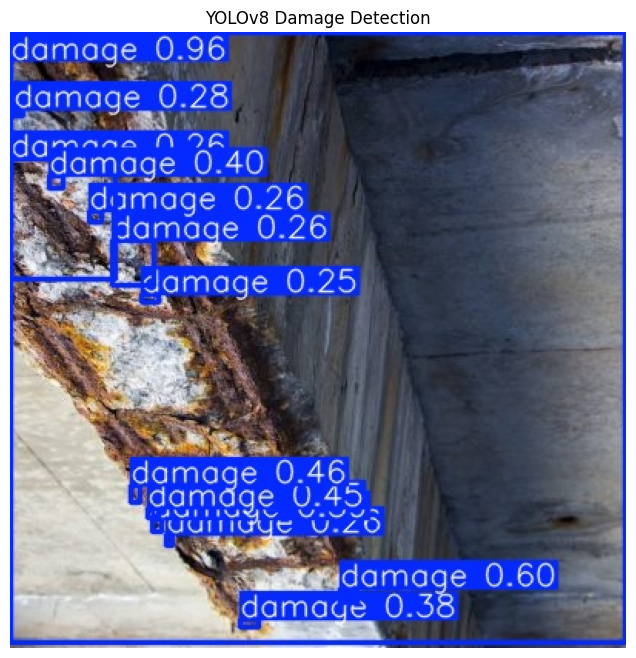

🧪 Estimating damage via thresholding...


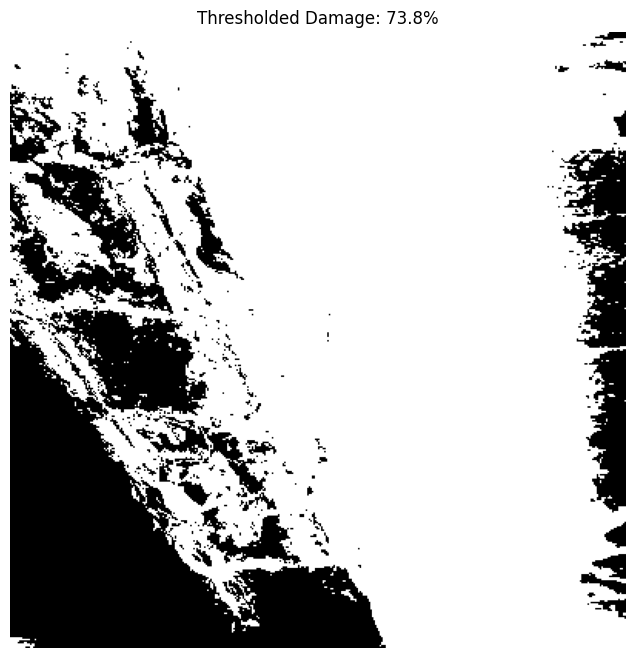

✅ Estimated Damage: 73.8%



In [5]:
# ✅ STEP 1: Install + Import
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from google.colab import files
import shutil

# ✅ STEP 2: Upload best.pt if not available
model_dir = "/content/runs/detects"
model_path = os.path.join(model_dir, "best.pt")

if not os.path.exists(model_path):
    print("📤 Please upload your trained best.pt model file")
    uploaded = files.upload()  # Let user upload
    os.makedirs(model_dir, exist_ok=True)
    for filename in uploaded.keys():
        shutil.move(filename, model_path)
    print(f"✅ best.pt saved to {model_path}")
else:
    print(f"✅ Found existing best.pt at {model_path}")

# ✅ STEP 3: Load YOLOv8 model
try:
    model = YOLO(model_path)
    print("✅ YOLOv8 model loaded successfully.")
except Exception as e:
    print(f"❌ Failed to load YOLOv8 model: {e}")
    model = None

# ✅ STEP 4: Define processing function
def process_uploaded_image(filename):
    if model is None:
        print("❌ Model not loaded.")
        return

    print(f"\n🔍 Running YOLOv8 inference on {filename}...")
    try:
        results = model.predict(source=filename, conf=0.25)
        results[0].save(filename="yolo_result.jpg")
        print("✅ YOLOv8 detection saved as 'yolo_result.jpg'")

        img_result = Image.open("yolo_result.jpg")
        plt.figure(figsize=(10, 8))
        plt.imshow(img_result)
        plt.axis('off')
        plt.title("YOLOv8 Damage Detection")
        plt.show()

        # Thresholding for damage estimation
        print("🧪 Estimating damage via thresholding...")
        img_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        if img_gray is not None:
            _, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
            total_pixels = thresh.size
            damage_pixels = np.sum(thresh == 255)
            damage_percent = round((damage_pixels / total_pixels) * 100, 2) if total_pixels > 0 else 0.0

            plt.figure(figsize=(10, 8))
            plt.imshow(thresh, cmap='gray')
            plt.axis('off')
            plt.title(f"Thresholded Damage: {damage_percent}%")
            plt.show()

            print(f"✅ Estimated Damage: {damage_percent}%\n")
        else:
            print("❌ Failed to read the image for thresholding.")

    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()

# ✅ STEP 5: Upload Image and Run
if model is not None:
    print("📤 Upload a bridge image to analyze")
    uploaded = files.upload()

    for filename in uploaded.keys():
        process_uploaded_image(filename)
else:
    print("❌ Skipping image processing since model not loaded.")


In [6]:
# ✅ YOLO Feature Extraction Cell
# Assumes model is already loaded from Cell 1

def extract_yolo_features(filename):
    global yolo_total_box_area, yolo_avg_confidence

    print(f"📦 Extracting bounding box features from {filename}...")
    try:
        results = model.predict(source=filename, conf=0.25)
        boxes = results[0].boxes

        total_area = 0.0
        confidences = []

        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            area = (x2 - x1) * (y2 - y1)
            total_area += area
            confidences.append(float(box.conf[0]))

        yolo_total_box_area = round(total_area, 2)
        yolo_avg_confidence = round(np.mean(confidences), 4) if confidences else 0.0

        print(f"\n✅ YOLO Feature Summary:")
        print(f"📐 Total Box Area: {yolo_total_box_area} px")
        print(f"🔍 Avg Confidence: {yolo_avg_confidence}")

    except Exception as e:
        print("❌ Error during YOLO feature extraction.")
        import traceback
        traceback.print_exc()

# === ✅ Reuse the uploaded image filename from Cell 1
# Example usage (you may replace filename):
# extract_yolo_features("your_uploaded_image.jpg")

# === Replace with correct filename (same as uploaded in Cell 1):
extract_yolo_features("yolo_result.jpg")


📦 Extracting bounding box features from yolo_result.jpg...

image 1/1 /content/yolo_result.jpg: 640x640 1 damage, 1322.2ms
Speed: 3.6ms preprocess, 1322.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

✅ YOLO Feature Summary:
📐 Total Box Area: 154730.640625 px
🔍 Avg Confidence: 0.9649


FileUpload(value={}, accept='.jpg,.jpeg,.png', description='Upload')

Button(button_style='success', description='Predict', style=ButtonStyle())

Output()

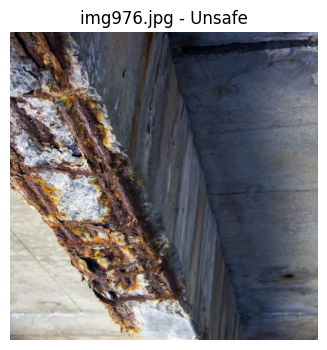


📊 Prediction Result:
🟢 Class: Unsafe
📉 Degradation Score: 36005.86
⏳ Remaining Life (years): 0.10000000149011612


In [8]:
import io
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# === Ensure model is loaded ===
from tensorflow.keras.models import load_model

model = load_model(
    '/content/drive/MyDrive/Het Private/GDToT/multimodal_model_full_24_unfrozen.h5',
    compile=False
)


# === Use YOLO features from Cell 2 if available, else default
total_box_area_val = globals().get('total_box_area', 0.0)
avg_confidence_val = globals().get('avg_confidence', 0.0)

# === Input feature definitions (avg_confidence shown only, not used in model input)
numeric_features = {
    'crack_width_mm': 0.0,
    'crack_length_cm': 0.0,
    'age_years': 10.0,
    'electrical_resistivity': 0.0,
    'half_cell_potential': 0.0,
    'delamination_depth_mm': 0.0,
    'cover_thickness_mm': 0.0,
    'total_box_area': total_box_area_val,     # ✅ From YOLO
    'avg_confidence': avg_confidence_val      # ✅ Display only
}

categorical_features = {
    'crack_orientation': ['vertical', 'horizontal', 'diagonal'],
    'location': ['deck', 'pier', 'girder', 'abutment'],
    'repair_history': ['none', 'minor', 'major'],
    'moisture_condition': ['dry', 'moderate', 'wet']
}

# === Create input widgets
num_inputs = {k: widgets.FloatText(value=v, layout=widgets.Layout(width='300px')) for k, v in numeric_features.items()}
cat_inputs = {k: widgets.Dropdown(options=v, layout=widgets.Layout(width='300px')) for k, v in categorical_features.items()}

display(HTML("<h3 style='color:#117A65;'>🧮 Fill Features for Prediction</h3>"))
display(HTML("<h4>📏 Numeric Inputs</h4>"))
for k, w in num_inputs.items():
    display(widgets.HBox([widgets.Label(f"{k.replace('_', ' ').title()}:", layout=widgets.Layout(width='200px')), w]))

display(HTML("<h4>🏷️ Categorical Inputs</h4>"))
for k, w in cat_inputs.items():
    display(widgets.HBox([widgets.Label(f"{k.replace('_', ' ').title()}:", layout=widgets.Layout(width='200px')), w]))

# === One-hot encoding helper
def encode_categorical(cat_inputs):
    encoded = []
    for k, dropdown in cat_inputs.items():
        options = categorical_features[k]
        one_hot = [1.0 if dropdown.value == opt else 0.0 for opt in options]
        encoded.extend(one_hot)
    return encoded

# === Upload image widget
upload_final = widgets.FileUpload(accept='.jpg,.jpeg,.png', multiple=False)
display(HTML("<h3 style='color:#2E86C1;'>📤 Upload Image for Final Prediction</h3>"), upload_final)

submit_btn = widgets.Button(description="Predict", button_style='success')
output_area = widgets.Output()

# === Prediction logic
def on_submit_click(b):
    with output_area:
        clear_output()

        # --- Check if image uploaded ---
        if not upload_final.value:
            print("❌ Please upload an image.")
            return

        # --- Use only model-required numeric features (exclude avg_confidence) ---
        ordered_keys = [
            'crack_width_mm', 'crack_length_cm', 'age_years',
            'electrical_resistivity', 'half_cell_potential',
            'delamination_depth_mm', 'cover_thickness_mm',
            'total_box_area'
        ]
        tabular_vals = [num_inputs[k].value for k in ordered_keys]

        # --- Encode categorical features ---
        encoded_cats = encode_categorical(cat_inputs)

        # Final tabular input = 8 numeric + 13 one-hot = 21 features
        full_tabular_input = np.array([tabular_vals + encoded_cats], dtype='float32')

        # --- Process image safely ---
        try:
            filename = list(upload_final.value.keys())[0]
            content = upload_final.value[filename]['content']

            # Validate file
            if not content:
                raise ValueError("Uploaded file is empty or invalid")

            # Convert to RGB
            img = Image.open(io.BytesIO(content)).convert('RGB')

            # Check dimensions
            if img.size[0] == 0 or img.size[1] == 0:
                raise ValueError(f"Image has zero dimension: {img.size}")

            # Resize to (128,128)
            img_resized = img.resize((128, 128), Image.BILINEAR)
            img_array = np.array(img_resized, dtype='float32') / 255.0

            # Validate shape
            if img_array.shape != (128, 128, 3):
                raise ValueError(f"Invalid image shape after resize: {img_array.shape}")

            sample_image = np.expand_dims(img_array, axis=0)

        except Exception as e:
            print("❌ Failed to process image:", e)
            return

        # --- Predict using the model ---
        try:
            pred_class, pred_score, pred_life = model.predict([sample_image, full_tabular_input])

            unsafe_prob = pred_class[0][0]   # Probability of unsafe
            base_life = pred_life[0][0]      # Remaining life prediction
            degradation = pred_score[0][0]   # Degradation score

            # Adjust life based on degradation
            if unsafe_prob > 0.5:
                adj_life = round(min(1.5, base_life * (1 - degradation / 100)), 2)
            else:
                adj_life = round(base_life, 2)

            adj_life = round(np.clip(adj_life, 0.1, 100), 2)
            label = 'Unsafe' if unsafe_prob > 0.5 else 'Safe'

            # Display results
            plt.figure(figsize=(8, 4))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{filename} - {label}")
            plt.show()

            print(f"\n📊 Prediction Result:")
            print(f"🟢 Class: {label}")
            print(f"📉 Degradation Score: {degradation:.2f}")
            print(f"⏳ Remaining Life (years): {adj_life}")

        except Exception as e:
            print("❌ Model prediction failed:", e)

submit_btn.on_click(on_submit_click)
display(submit_btn, output_area)
